In [1]:
import os
os.chdir("../")

In [2]:
import random
import pandas as pd
import json
import seaborn as sns
import sys
import matplotlib.pyplot as plt
sys.path.append('./src')
sns.set(rc={'figure.figsize':(16, 4)})
plt.rcParams['figure.dpi'] = 150

In [3]:
def plot_well_data(data,start=None,end=None):
    plt.plot(data.loc[start:end,'value'],marker='.', linestyle='-', linewidth=0.5,label='Monthly')
    plt.title(f'well: {data.cluster.iloc[0]}, cluster: {data.cluster.iloc[0]}')
    data_Y = data.resample('YE').agg({'value':'mean','cluster':'first'})
    plt.plot(data_Y.loc[start:end,'value'],marker='o', markersize=8, linestyle='-',label='Yearly')
    plt.legend()


In [4]:
config_file = "./config.json"
with open(config_file, 'r') as f:
    config = json.load(f)

In [5]:
df = (pd.read_csv(config['train_data_path'],parse_dates=['date'])
      .sort_values(by=['well','date'])
      )

Text(0, 0.5, 'Production metric')

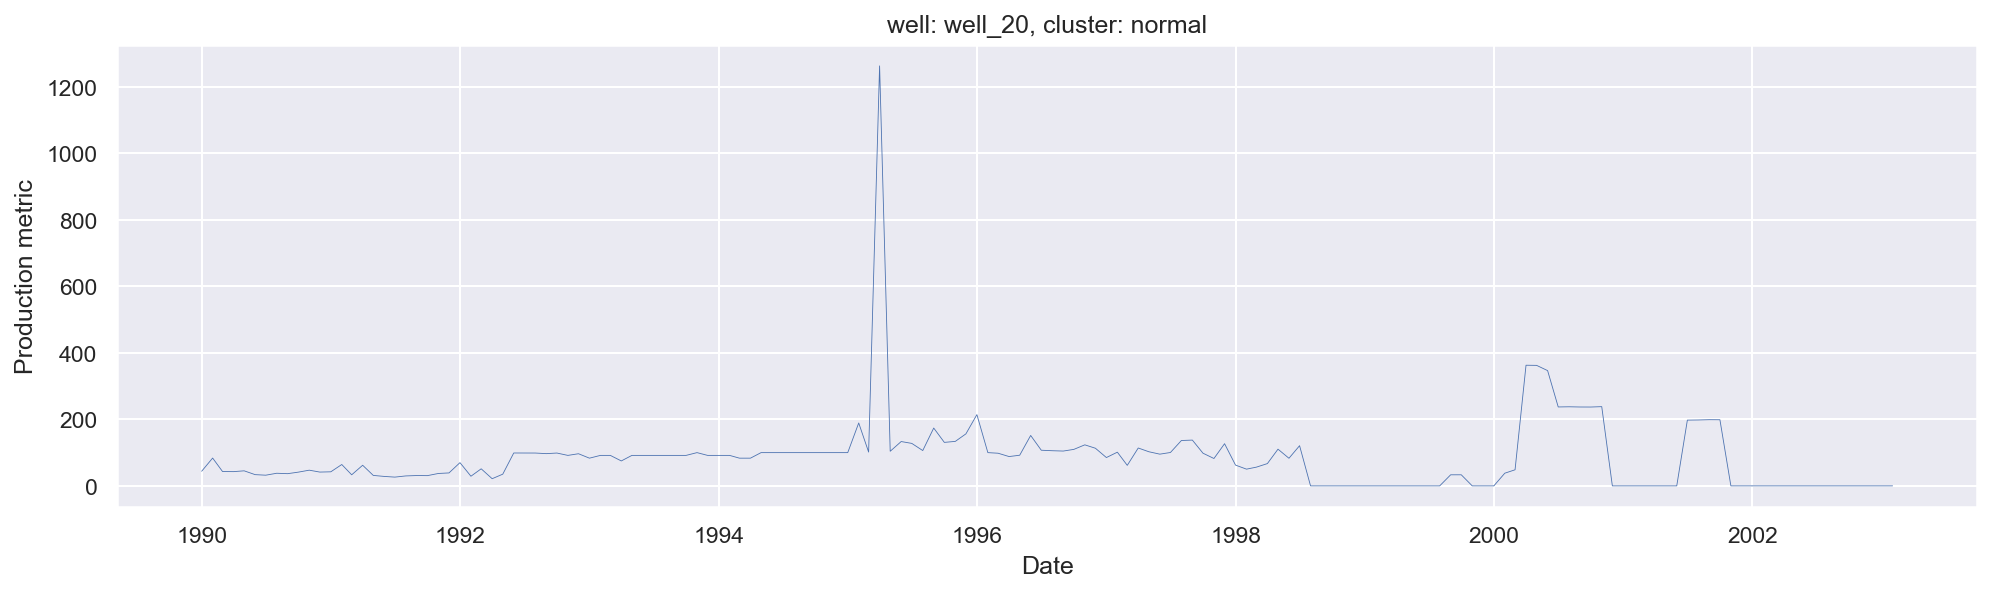

In [37]:
well= random.choice(df.well.to_list())
data = df.groupby('well').get_group(well)
plt.plot(data['date'],data['value'],linewidth=0.4)
plt.title(f'well: {well}, cluster: {data.cluster.iloc[0]}')
plt.xlabel('Date')
plt.ylabel('Production metric')

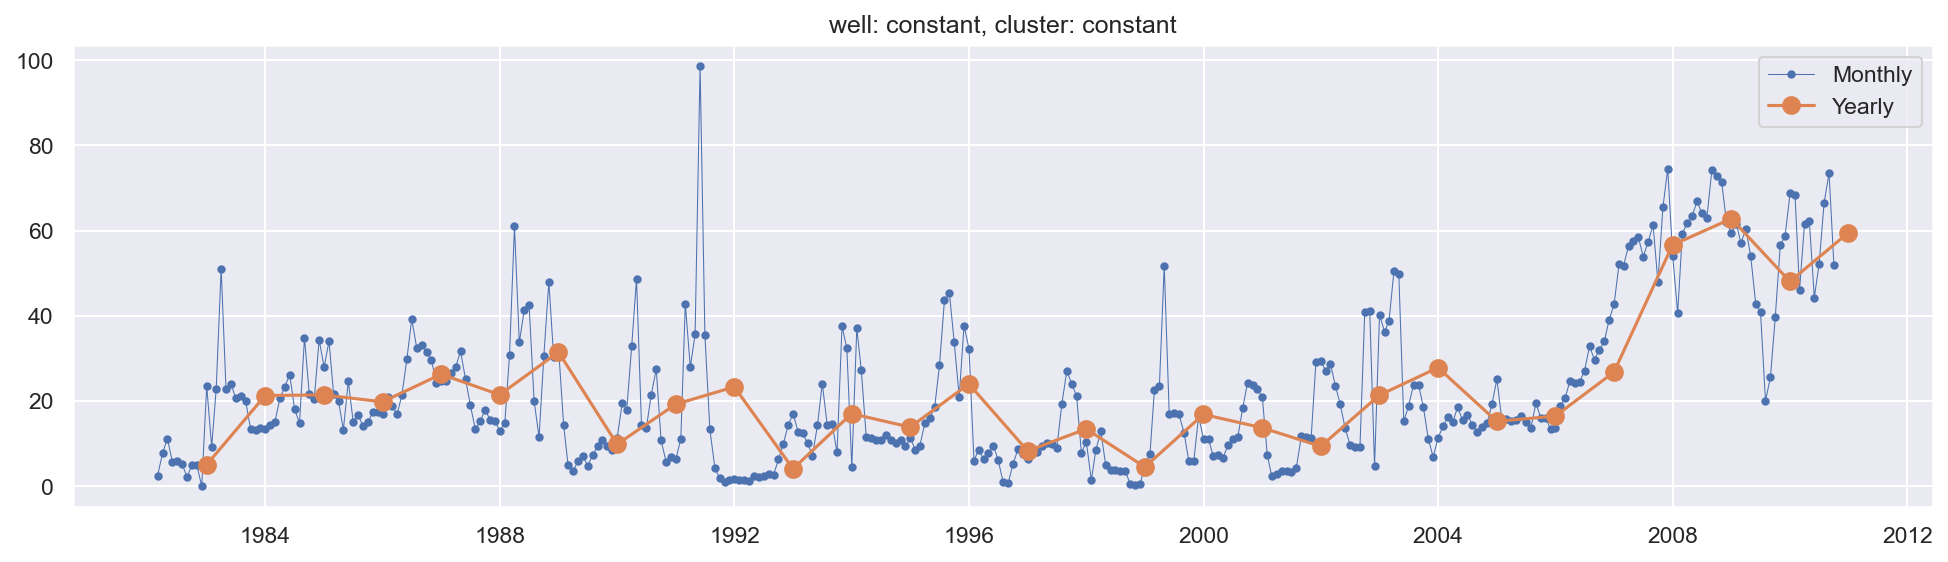

In [7]:
cluster = 'constant'
df_cluster = df[df.cluster==cluster]
well= random.choice(df_cluster.well.to_list())
data = df.groupby('well').get_group(well).set_index('date')
plot_well_data(data)

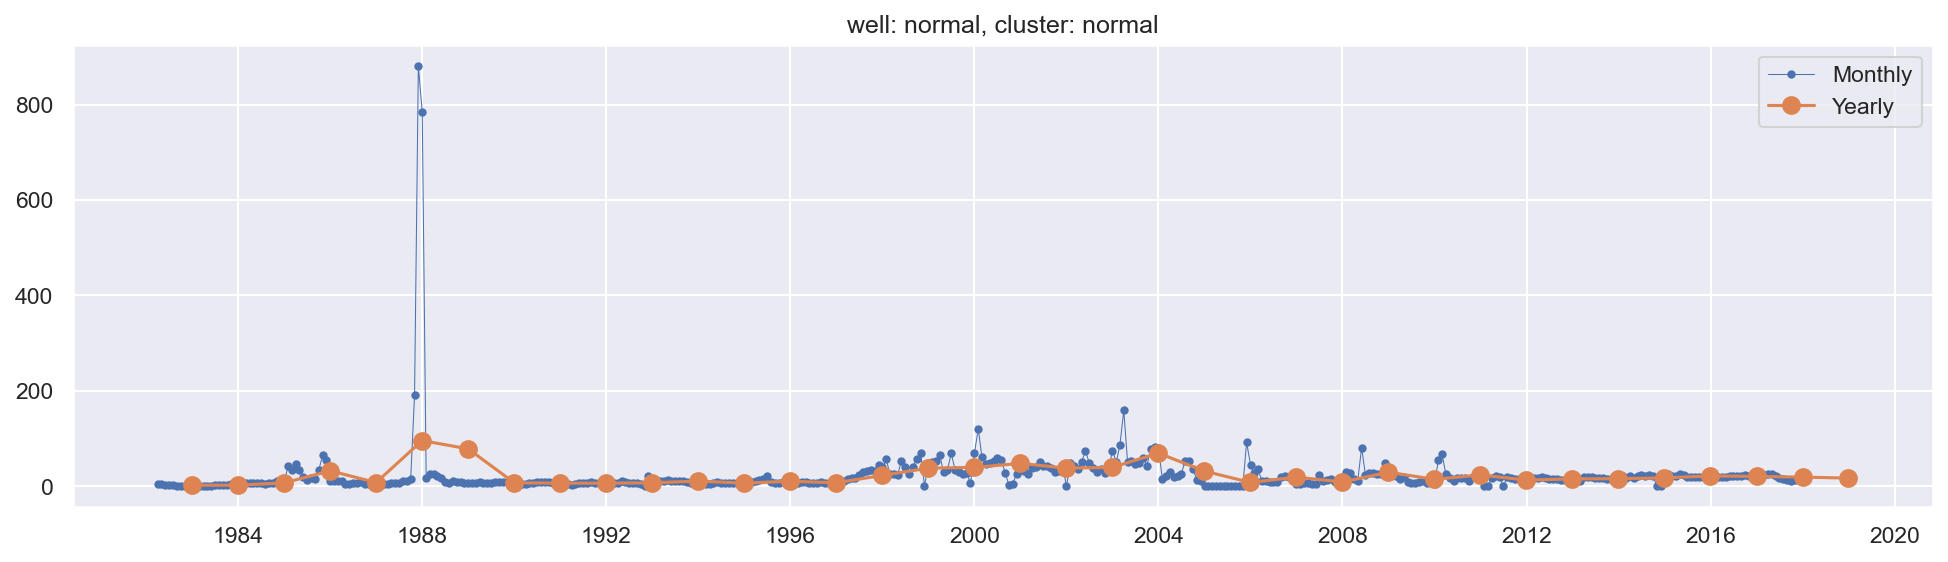

In [8]:
cluster = 'normal'
df_cluster = df[df.cluster==cluster]
well= random.choice(df_cluster.well.to_list())
data = df.groupby('well').get_group(well).set_index('date')
plot_well_data(data)

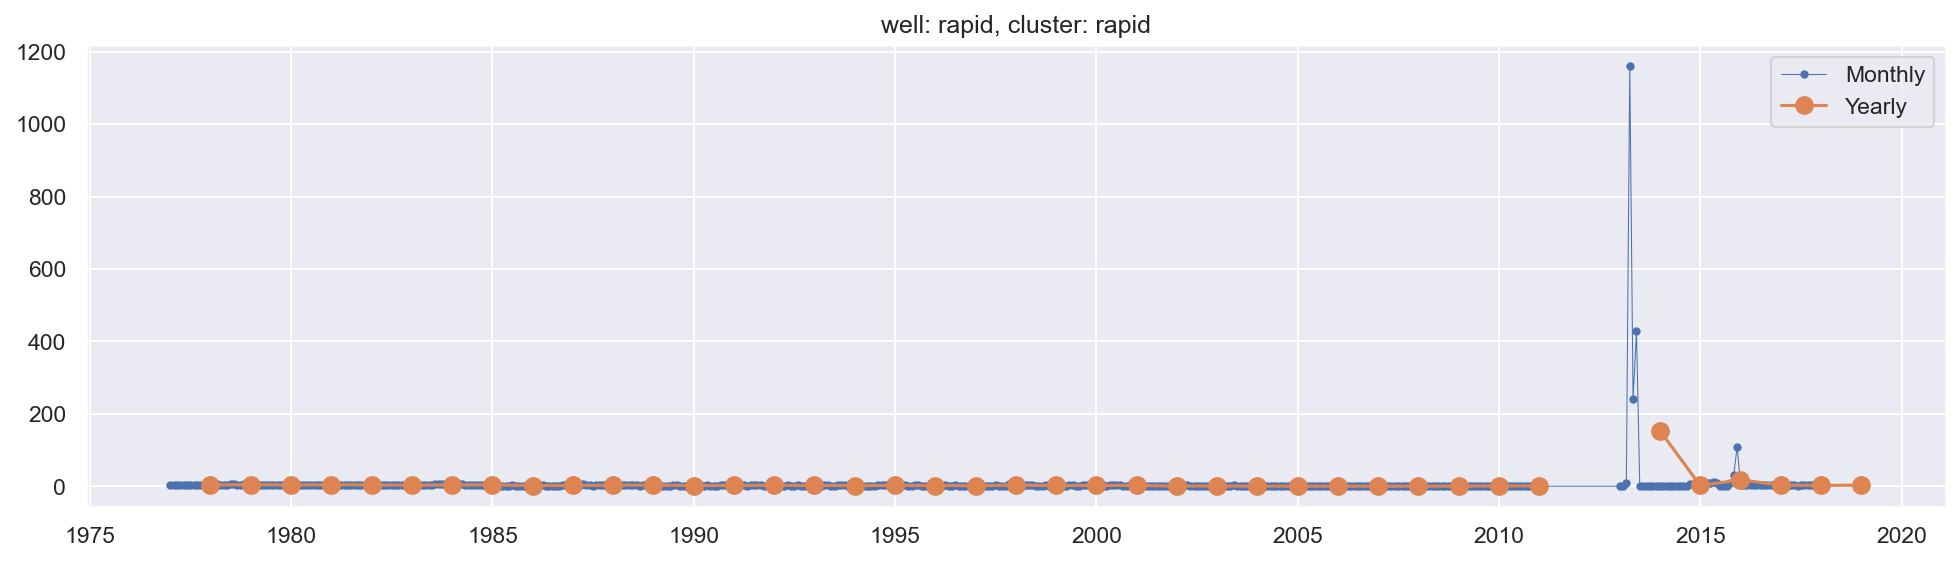

In [44]:
cluster = 'rapid'
df_cluster = df[df.cluster==cluster]
well= random.choice(df_cluster.well.to_list())
data = df.groupby('well').get_group(well).set_index('date')
plot_well_data(data)

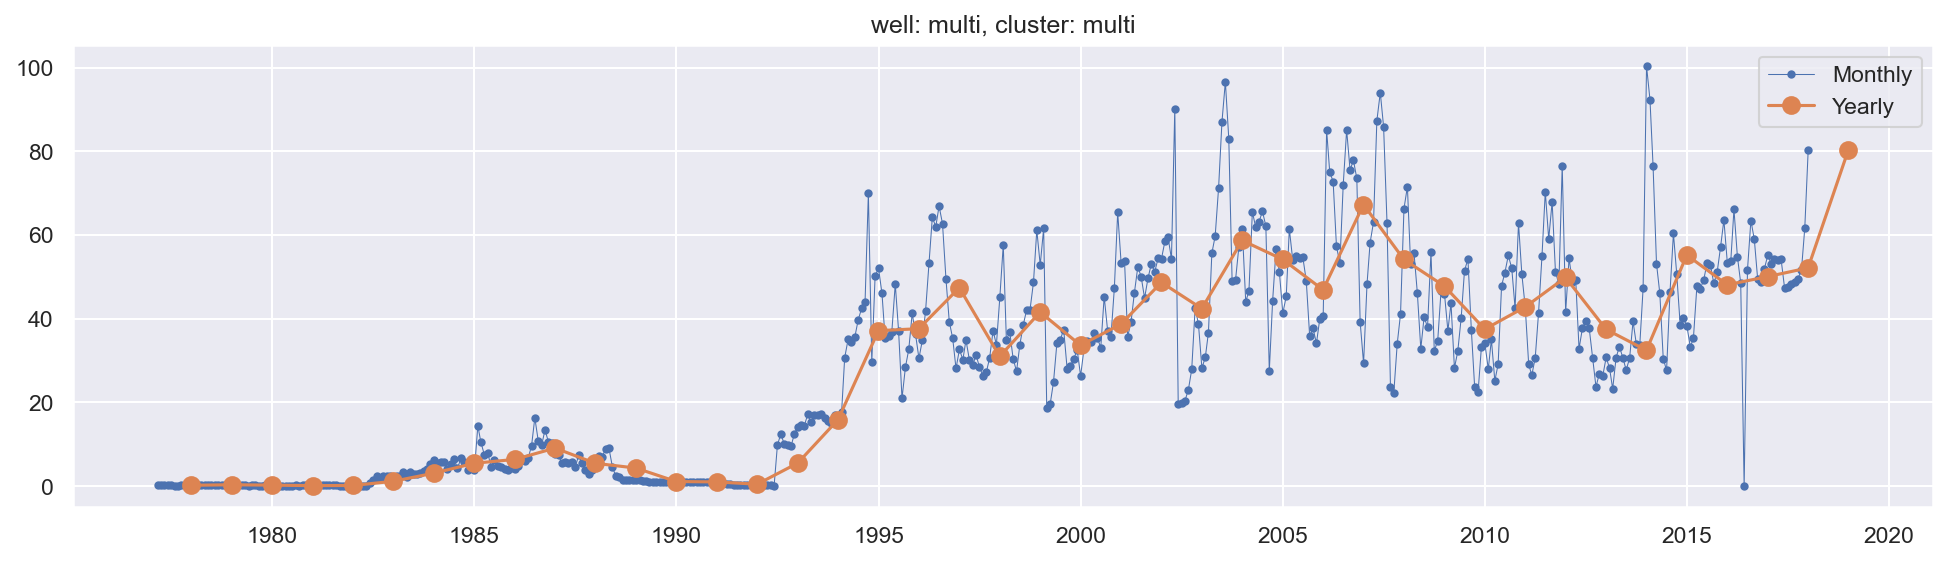

In [10]:
cluster = 'multi'
df_cluster = df[df.cluster==cluster]
well= random.choice(df_cluster.well.to_list())
data = df.groupby('well').get_group(well).set_index('date')
plot_well_data(data)

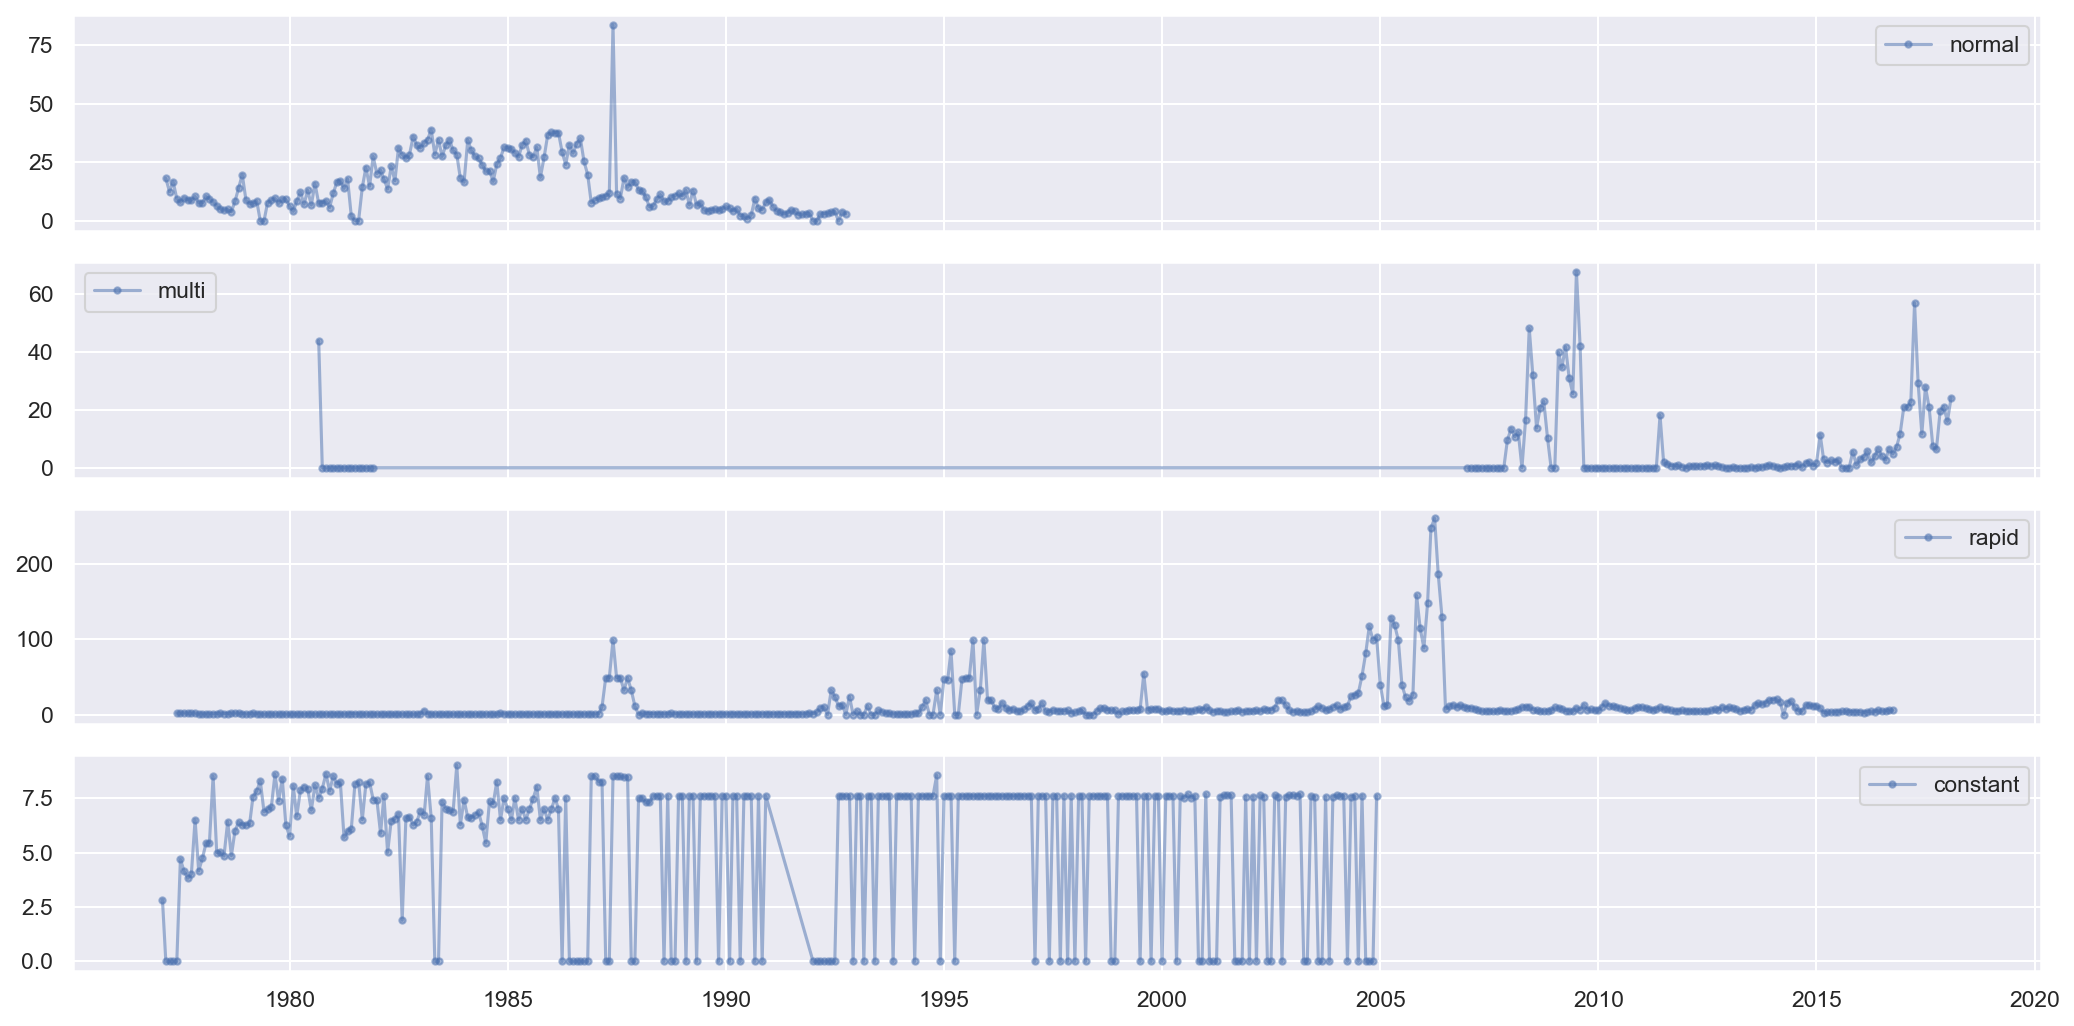

In [11]:
start = None  # '2005'
end = None  # '2020'
N = 1

wells = df.groupby(['cluster'])['well'].sample(N).to_list()
data = df[df.well.isin(wells)]

fig, axs = plt.subplots(len(wells), 1, figsize=(14, 7), sharex=True)
for i, (name, data) in enumerate(data.groupby('well')):
    label = data['cluster'].iloc[0]
    data = data.set_index('date')
    ax = axs[i] if len(wells) > 1 else axs
    ax.plot(data.loc[start:end, 'value'],
            alpha=0.5,
            label=label,
            marker='.',
            linestyle='-')
    ax.legend()

plt.tight_layout()
plt.show()

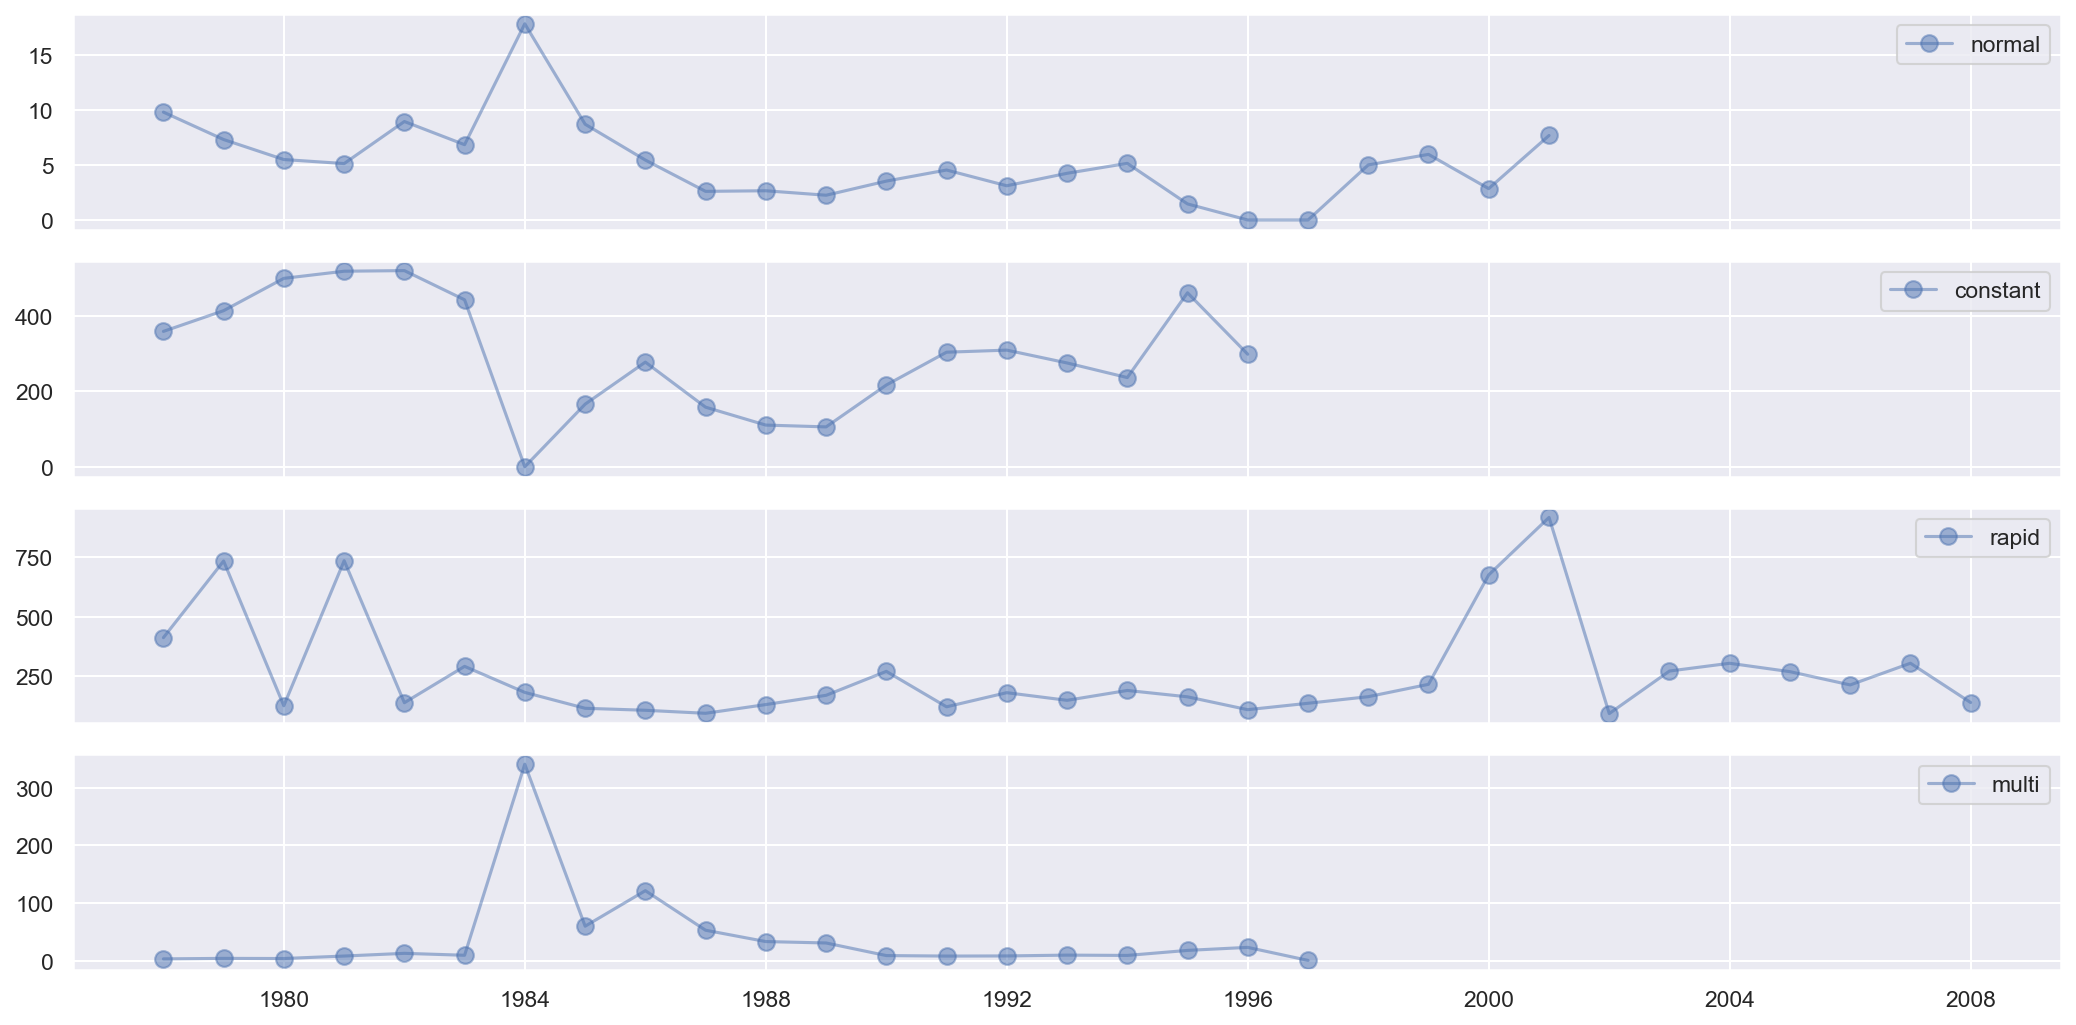

In [12]:
start = None  # '2005'
end = None  # '2020'
N = 1
wells = df.groupby(['cluster'])['well'].sample(N).to_list()
small_ds = df[df.well.isin(wells)]

fig, axs = plt.subplots(len(wells), 1, figsize=(14, 7), sharex=True)
for i, (name, data) in enumerate(small_ds.groupby('well')):
    label = data['cluster'].iloc[0]
    data = data.set_index('date').resample('YE').agg({'value': 'sum', 'cluster': 'first'})
    ax = axs[i] if len(wells) > 1 else axs
    ax.plot(data.loc[start:end, 'value'],
            alpha=0.5,
            label=label,
            marker='o',
            markersize=8,
            linestyle='-')
    ax.legend()

plt.tight_layout()
plt.show()

,well,cluster
245,well_131,constant
386,well_150,rapid
1694,well_201,normal
182,well_227,multi


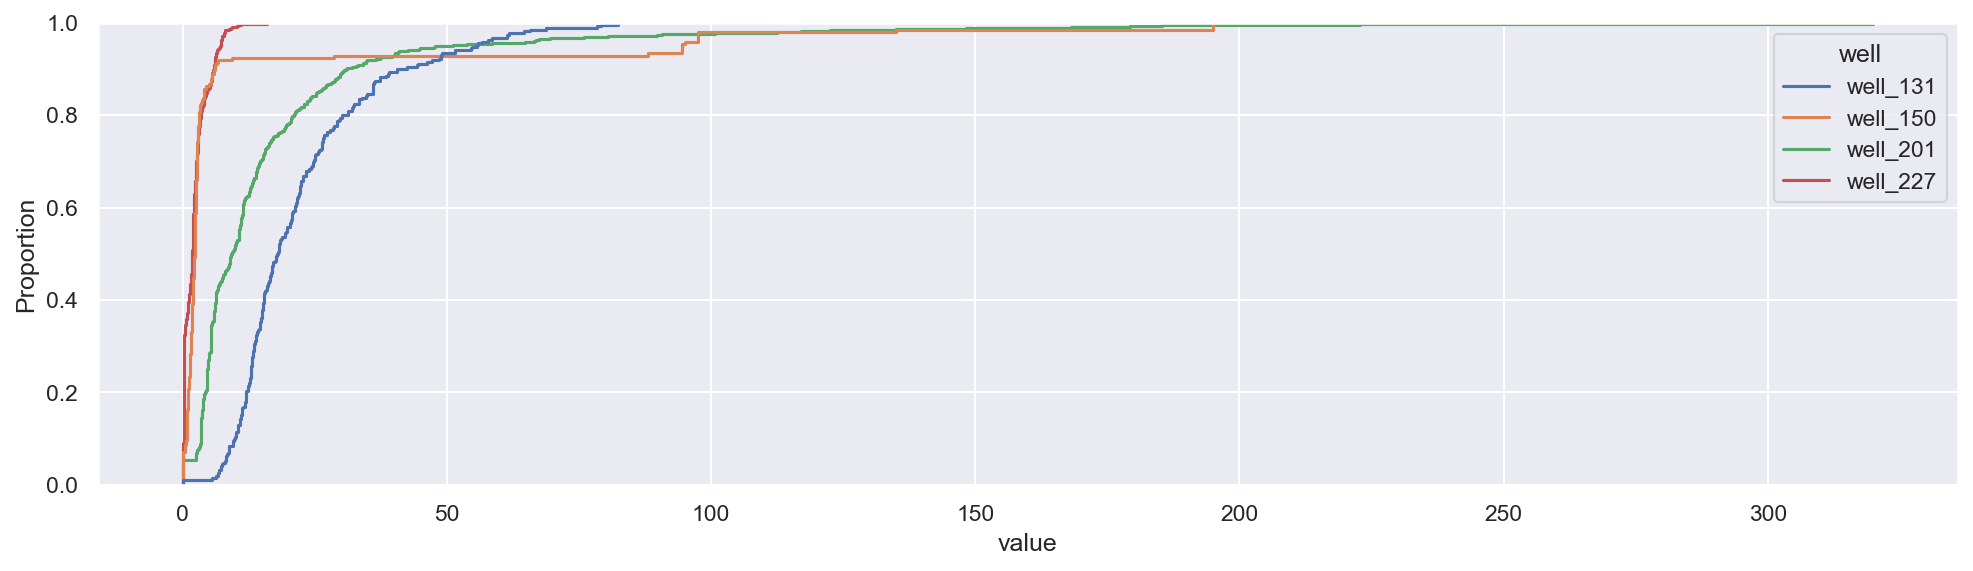

In [13]:
wells = df.groupby(['cluster'])['well'].sample(N).to_list()
data = df[df.well.isin(wells)]
sns.ecdfplot(x='value',data=data, hue='well')
data.filter(['well','cluster']).drop_duplicates()